In [144]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

## Get naive and ground truth occupancy percentage data

In [62]:
X_data = pd.read_csv('X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


## Group data to day snapshot

In [238]:
# Group data to day snapshot
X_data = np.reshape(X_data, (84,720))
print('Naive occupancy')
print(X_data.shape)
print(X_data[0][:10])

Y_data = np.reshape(Y_data, (84,720))
print('Actual occupancy')
print(Y_data.shape)
print(Y_data[0][:10])

Naive occupancy
(84, 720)
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
(84, 720)
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [239]:
def data_fft(X,Y):
    n = len(X)
    X_fft = np.empty(X.shape, complex)
    Y_fft = np.empty(Y.shape, complex)
    for i in range(n):
        X_fft[i] = fft(X[i])
        Y_fft[i] = fft(Y[i])
    return X_fft, Y_fft

In [240]:
def MAE(predict, test):
    n = len(predict)
    error = 0
    for i in range(n):
        error += np.mean(np.abs(test-predict))
    return error/n

In [259]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=52)

In [260]:
xf_train, yf_train = data_fft(x_train, y_train)
thetas = np.linalg.lstsq(xf_train, yf_train, rcond=None)[0]
prediction_ft = np.fft.fft(x_test)@thetas

In [261]:
n = len(x_test)
prediction = np.empty(prediction_ft.shape)
for i in range(n):
    prediction[i] = np.abs(ifft(prediction_ft[i]))

In [262]:
random_list = random.sample(range(0, n), 9)

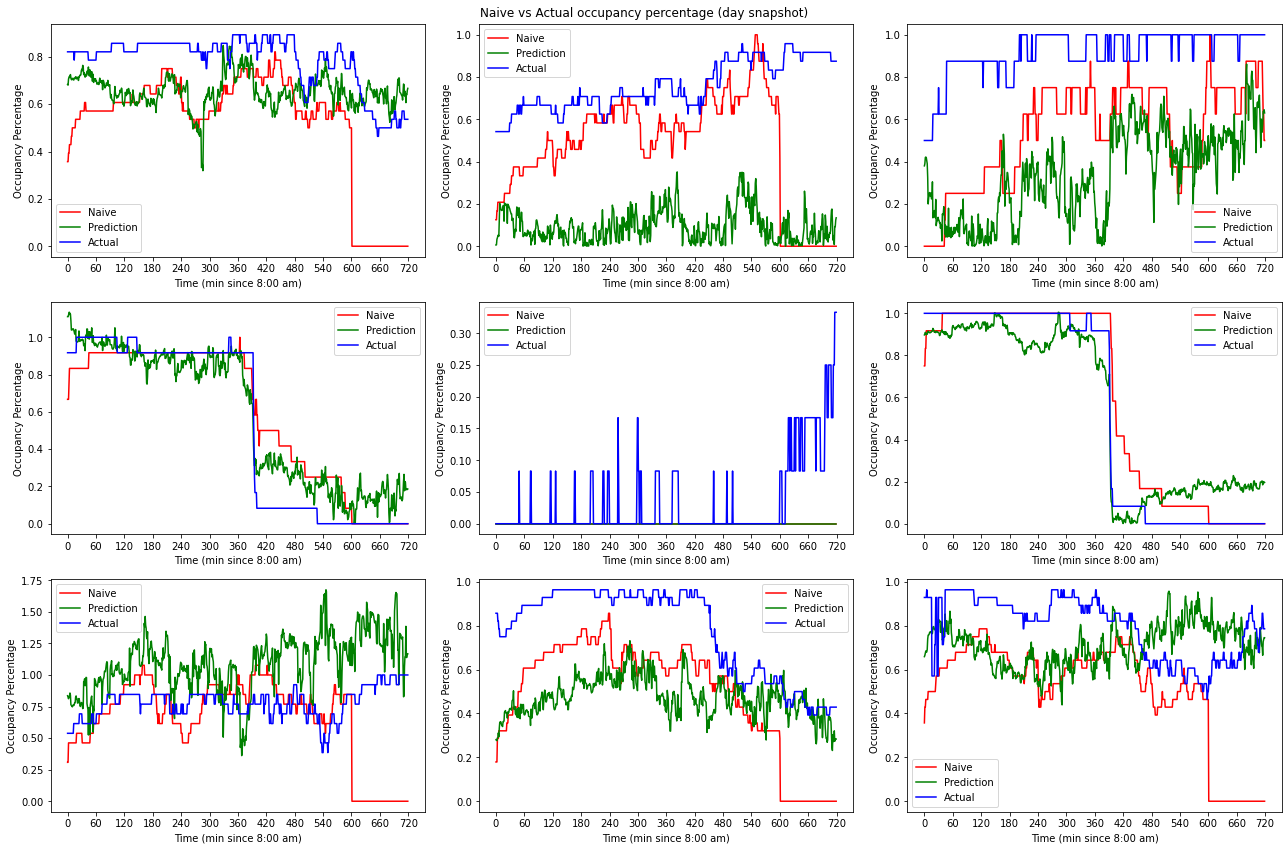

In [263]:
# Display random set of naive and actual occupancy percentage 

time = np.arange(720)

plt.figure(figsize=(18,12))
plt.suptitle('Naive vs Actual occupancy percentage (day snapshot)')

for i in range(9):
    index = random_list[i]
    plt.subplot(3, 3, i+1)
    plt.plot(time, x_test[index], color='r', label='Naive')
    plt.plot(time, prediction[index], color='g', label='Prediction')
    plt.plot(time, y_test[index], color='b', label='Actual')
    plt.legend()
    plt.xlabel('Time (min since 8:00 am)')
    plt.xticks(np.arange(0,780,60))
    plt.ylabel('Occupancy Percentage')

plt.tight_layout()
plt.show()

In [257]:
naive_error = MAE(x_test, y_test)
print(naive_error)

0.35052883986928113


In [258]:
prediction_error = MAE(prediction, y_test)
print(prediction_error)

0.3781539737844577
